In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('white')

In [21]:
year = 2019
ticker = 'IFM'
string = str(year)+'/'+ticker+'.csv'
col_names=['TIME', 'X', 'Y', 'Z'] 

df = pd.read_csv(os.path.join('E:\CTA quant/ml_cta-master/data/index/',string), index_col=0, encoding='gbk')
df.columns = ['code', 'time', 'open', 'high', 'low', 'close', 'volume', 'turnover', 'open interest']

df.rename_axis("type", axis='index', inplace=True)
df['time'] = pd.to_datetime(df['time'])

df.reset_index(inplace=True)

#df = df.iloc[0:100, :]
#df.head(1000)


In [67]:
df['day'] = df['time'].map(lambda x: x.year)*10000 + df['time'].map(lambda x: x.month)*100 + df['time'].map(lambda x: x.day)

In [120]:
df[df.day == 20190102][:120]

,type,code,time,open,high,low,close,volume,turnover,open interest,...,return_240,vol_1,vol_5,vol_30,vol_60,vol_120,vol_240,day,return_2,vol_2
0,SF,IF1901,2019-01-02 09:31:00,3012.4,3013.2,3008.0,3008.6,1021.0,922330440.0,49161,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20190102,NaN,NaN
1,SF,IF1901,2019-01-02 09:32:00,3008.6,3009.2,3006.8,3007.8,503.0,453875220.0,48889,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20190102,-0.001527,0.000704
2,SF,IF1901,2019-01-02 09:33:00,3007.6,3010.8,3007.4,3010.2,363.0,327685260.0,48727,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20190102,0.000532,0.000799
3,SF,IF1901,2019-01-02 09:34:00,3010.4,3010.8,3003.6,3004.2,554.0,499784340.0,48430,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20190102,-0.001130,0.002068
4,SF,IF1901,2019-01-02 09:35:00,3004.2,3006.0,3003.2,3003.6,326.0,293845920.0,48235,...,NaN,0.0,0.002232,NaN,NaN,NaN,NaN,20190102,-0.002259,0.001315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,SF,IF1901,2019-01-02 11:26:00,2972.2,2973.6,2969.4,2970.8,151.0,134622780.0,44694,...,NaN,0.0,0.000765,0.002939,0.004400,NaN,NaN,20190102,0.000067,0.000666
116,SF,IF1901,2019-01-02 11:27:00,2970.6,2970.6,2967.8,2968.6,84.0,74812800.0,44723,...,NaN,0.0,0.001037,0.003009,0.004449,NaN,NaN,20190102,-0.001211,0.000143
117,SF,IF1901,2019-01-02 11:28:00,2968.0,2968.4,2966.4,2968.4,82.0,73003620.0,44719,...,NaN,0.0,0.001037,0.003009,0.004432,NaN,NaN,20190102,-0.000741,0.000571
118,SF,IF1901,2019-01-02 11:29:00,2968.0,2969.2,2968.0,2969.0,57.0,50763300.0,44714,...,NaN,0.0,0.001010,0.003029,0.004443,NaN,NaN,20190102,0.000337,0.000143


In [83]:
# calculate volatility and return
# return for each min:
import math
mins = [2,5,30,60,120,240]
for m in mins:
    df['return_'+str(m)] = (df['close']-df['open'].shift(periods = m-1))/(df['open'].shift(periods = m-1))

# caculate volatility for each look back window:
for m in mins:
    df['vol_'+str(m)] = df['return_1'].rolling(m).std(ddof = 0) * math.sqrt(m)
    
# print correlation between return and volatility
for m in mins:
    print(df['return_'+str(m)][m:].corr(df['vol_'+str(m)][m:]))
    

0.026486155975158153
0.044811659793386326
0.07556304058638523
0.09245722662902565
0.09505984595107252
0.09172008959767589


In [99]:
# investigate correlation between return and volatility on a given day:
date = 20190115  #choose the date
d = df[df.day == date]
for m in mins:
    d['return_'+str(m)] = (d['close']-d['open'].shift(periods = m-1))/(d['open'].shift(periods = m-1))

# caculate volatility for each look back window:
for m in mins:
    d['vol_'+str(m)] = d['return_1'].rolling(m).std(ddof = 0) * math.sqrt(m)
    
# print correlation between return and volatility
for m in mins:
    print(d['return_'+str(m)][m:].corr(d['vol_'+str(m)][m:]))


0.22412516610824915
0.4124949904627027
0.2276133693487714
-0.10313556277594871
0.4973989368046153
nan


C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


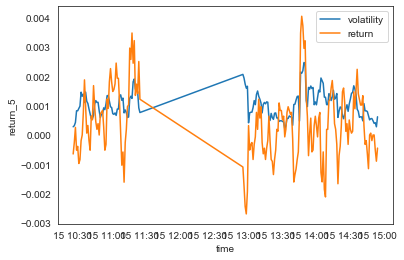

In [100]:
minute = 60
sns.lineplot(d.time[minute:], d.vol_5[minute:],label = 'volatility')
sns.lineplot(d.time[minute:], d.return_5[minute:],label = 'return')

In [101]:
# we notice there exist a lunch time buffer in a certain day, we see what happens if we get rid of the lunch break hours
# investigate correlation between return and volatility on a given day:
date = 20190115  #choose the date
d_bl = df[df.day == date].iloc[:120,:] # before lunch hour
d_al = df[df.day == date].iloc[-120:,:] # after lunch hour
def correlation(d):
    for m in mins:
        d['return_'+str(m)] = (d['close']-d['open'].shift(periods = m-1))/(d['open'].shift(periods = m-1))

    # caculate volatility for each look back window:
    for m in mins:
        d['vol_'+str(m)] = d['return_1'].rolling(m).std(ddof = 0) * math.sqrt(m)

    # print correlation between return and volatility
    for m in mins:
        print(d['return_'+str(m)][m:].corr(d['vol_'+str(m)][m:]))

correlation(d_bl)    
correlation(d_al) 

0.37505476472836763
0.5437583780519805
0.033070033878288406
-0.378247943631339
nan
nan
0.10587053420276737
0.30497960204634256
0.45714651954930746
0.7061146034693437
nan
nan


In [121]:
# see the trend of correlation:
def correlation_record(d):
    corrs = []
    for m in mins:
        d['return_'+str(m)] = (d['close']-d['open'].shift(periods = m-1))/(d['open'].shift(periods = m-1))

    # caculate volatility for each look back window:
    for m in mins:
        d['vol_'+str(m)] = d['return_1'].rolling(m).std(ddof = 0) * math.sqrt(m)

    # print correlation between return and volatility
    for m in mins:
        corrs.append(d['return_'+str(m)][m:].corr(d['vol_'+str(m)][m:]))
    return corrs
dic = {}
dic1 = {}
dic2 = {}
for m in mins:
    dic[m] = []
    dic1[m] = []
    dic2[m] = []
    
for date in df.day.unique():
    d = df[df.day == date] # all day
    d_bl = df[df.day == date].iloc[:120,:] # before lunch hour
    d_al = df[df.day == date].iloc[120:,:] # after lunch hour
    corrs = correlation_record(d)
    corrs1 = correlation_record(d_bl)
    corrs2 = correlation_record(d_al)
    i = 0
    for m in mins:
        dic[m].append(corrs[i])
        dic1[m].append(corrs1[i])
        dic2[m].append(corrs2[i])
        i = i+1


C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, '60-minute window correlation')

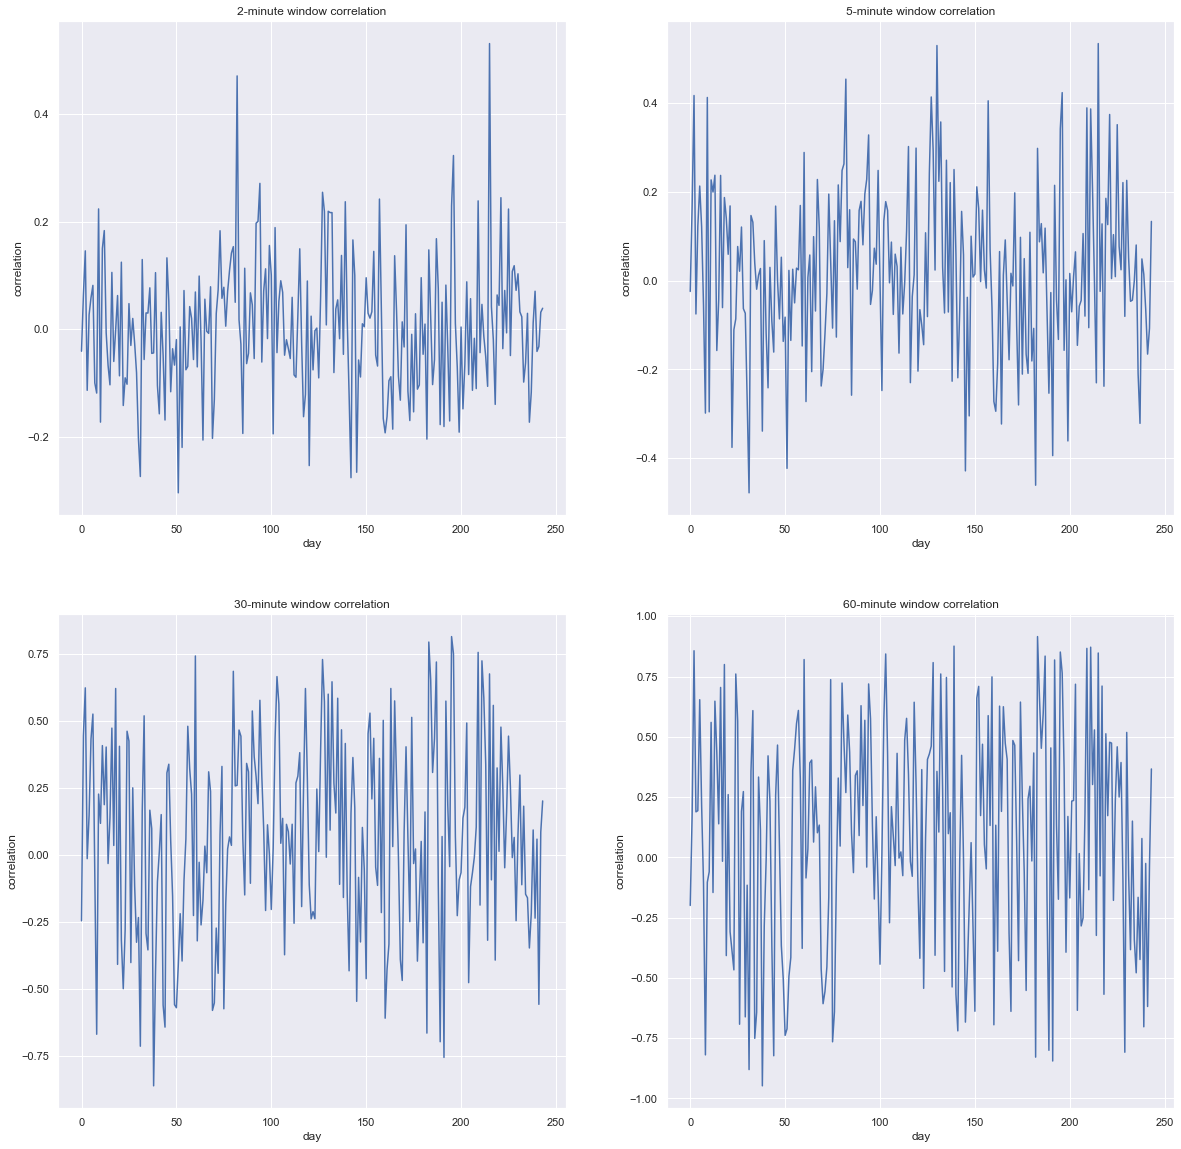

In [122]:
# intraday correlation plotted
t = len(df.day.unique())
T = np.arange(t)
sns.set()
fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].plot(T,dic[2],label = 'correlation')
ax[0,0].set_xlabel('day')
ax[0,0].set_ylabel('correlation')
ax[0,0].set_title('2-minute window correlation')
ax[0,1].plot(T,dic[5],label = 'correlation')
ax[0,1].set_xlabel('day')
ax[0,1].set_ylabel('correlation')
ax[0,1].set_title('5-minute window correlation')
ax[1,0].plot(T,dic[30],label = 'correlation')
ax[1,0].set_xlabel('day')
ax[1,0].set_ylabel('correlation')
ax[1,0].set_title('30-minute window correlation')
ax[1,1].plot(T,dic[60],label = 'correlation')
ax[1,1].set_xlabel('day')
ax[1,1].set_ylabel('correlation')
ax[1,1].set_title('60-minute window correlation')

Text(0.5, 1.0, '60-minute window correlation')

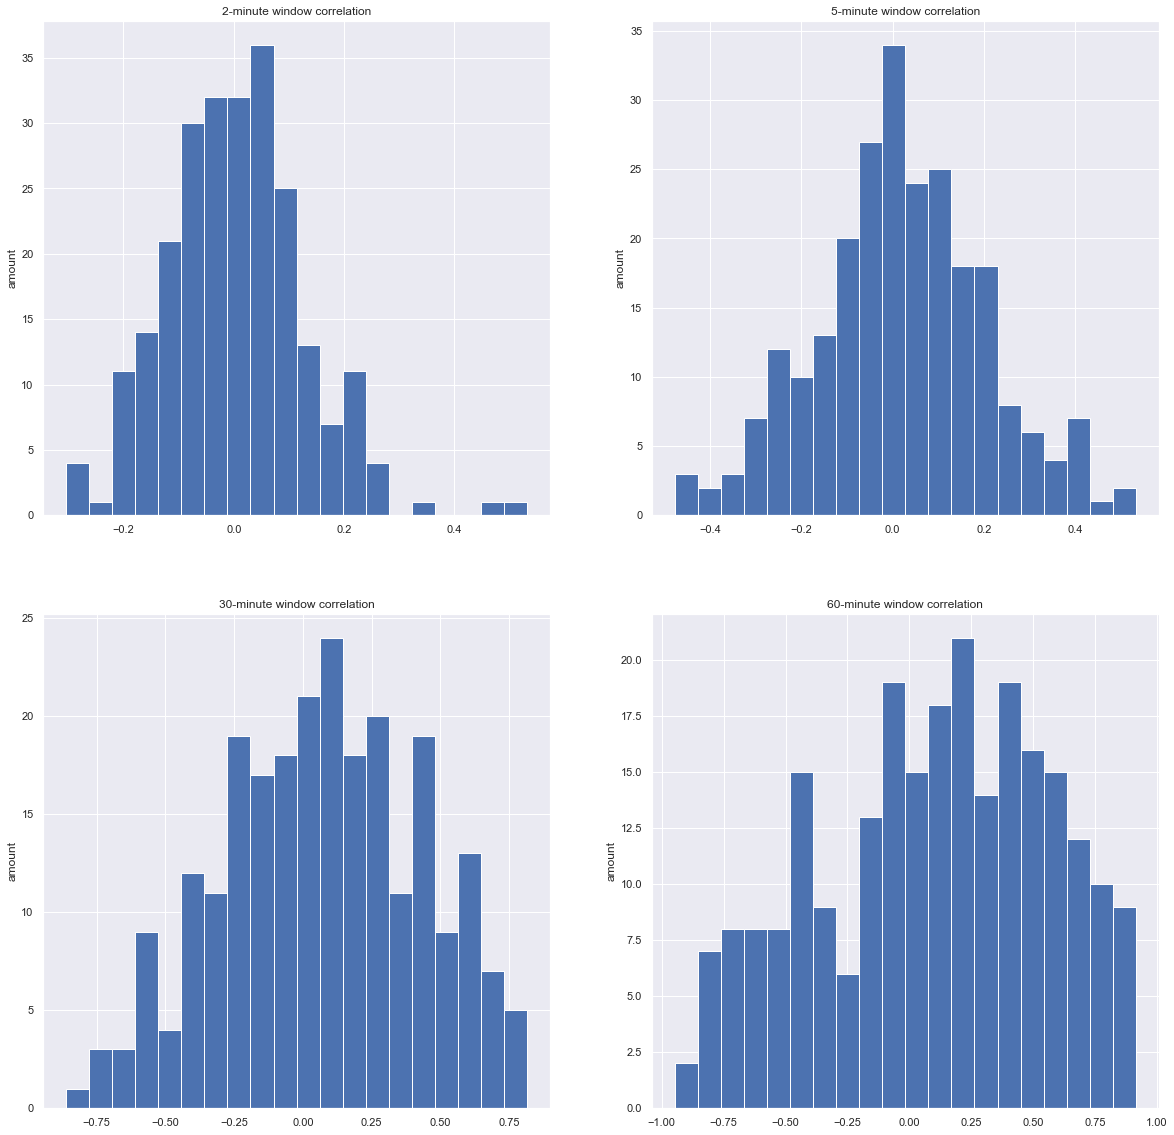

In [123]:
#histplot might be easier to observe this
# intraday correlation
bins = 20
fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].hist(dic[2],bins = bins, label = 'correlation')
# ax[0,0].set_xlabel('day')
ax[0,0].set_ylabel('amount')
ax[0,0].set_title('2-minute window correlation')
ax[0,1].hist(dic[5],bins = bins,label = 'correlation')
# ax[0,1].set_xlabel('day')
ax[0,1].set_ylabel('amount')
ax[0,1].set_title('5-minute window correlation')
ax[1,0].hist(dic[30],bins = bins,label = 'correlation')
# ax[1,0].set_xlabel('day')
ax[1,0].set_ylabel('amount')
ax[1,0].set_title('30-minute window correlation')
ax[1,1].hist(dic[60],bins = bins,label = 'correlation')
# ax[1,1].set_xlabel('day')
ax[1,1].set_ylabel('amount')
ax[1,1].set_title('60-minute window correlation')

Text(0.5, 1.0, '60-minute window correlation')

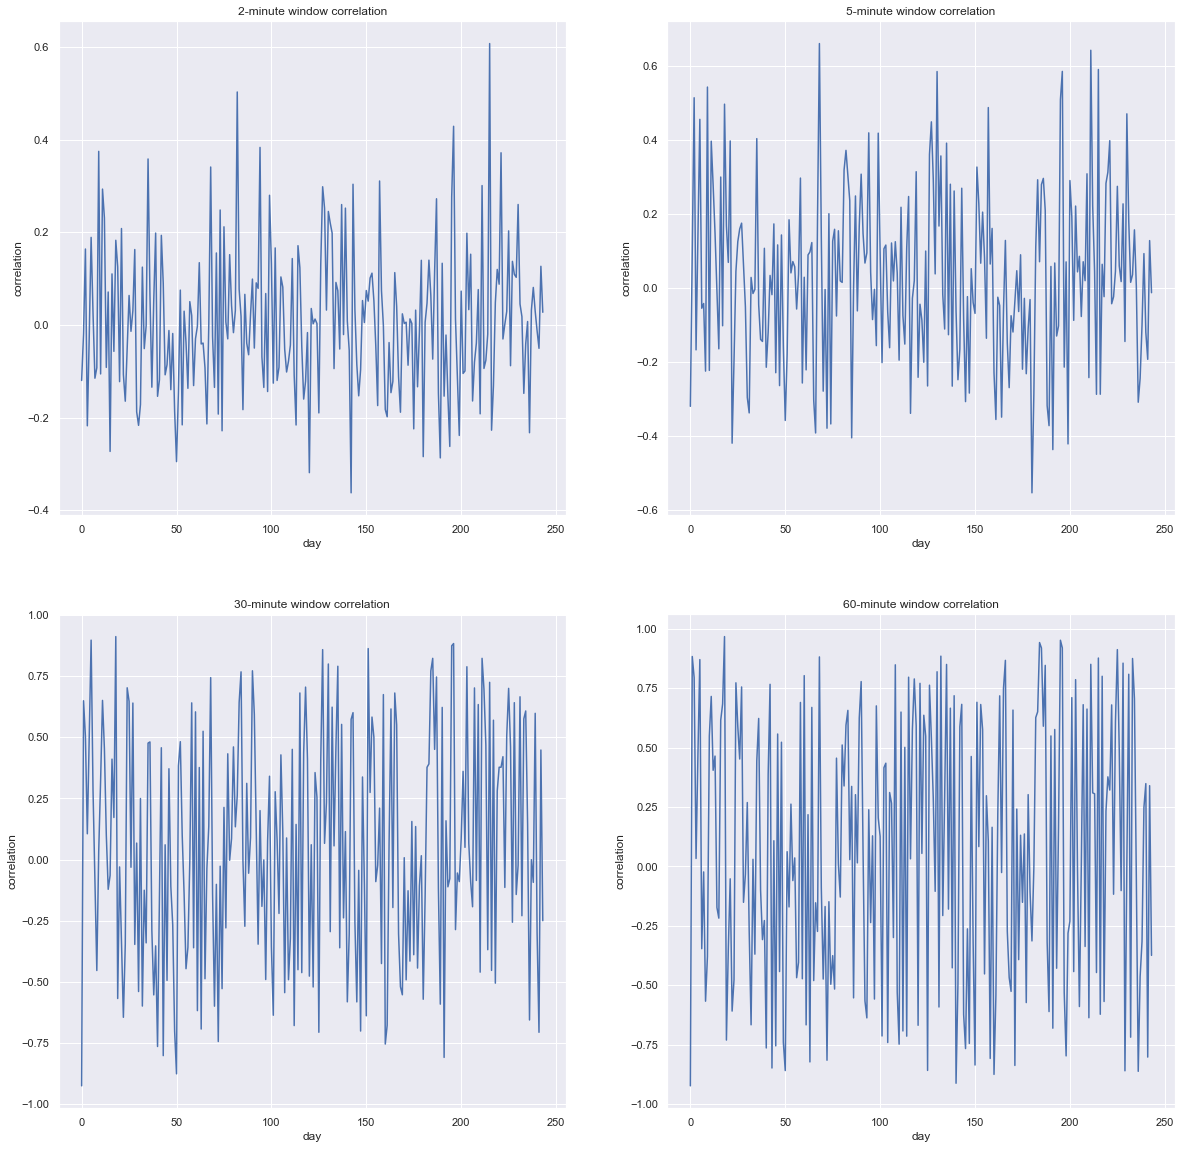

In [109]:
# before lunch correlation recorded
t = len(df.day.unique())
T = np.arange(t)
sns.set()
fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].plot(T,dic1[2],label = 'correlation')
ax[0,0].set_xlabel('day')
ax[0,0].set_ylabel('correlation')
ax[0,0].set_title('2-minute window correlation')
ax[0,1].plot(T,dic1[5],label = 'correlation')
ax[0,1].set_xlabel('day')
ax[0,1].set_ylabel('correlation')
ax[0,1].set_title('5-minute window correlation')
ax[1,0].plot(T,dic1[30],label = 'correlation')
ax[1,0].set_xlabel('day')
ax[1,0].set_ylabel('correlation')
ax[1,0].set_title('30-minute window correlation')
ax[1,1].plot(T,dic1[60],label = 'correlation')
ax[1,1].set_xlabel('day')
ax[1,1].set_ylabel('correlation')
ax[1,1].set_title('60-minute window correlation')

Text(0.5, 1.0, '60-minute window correlation')

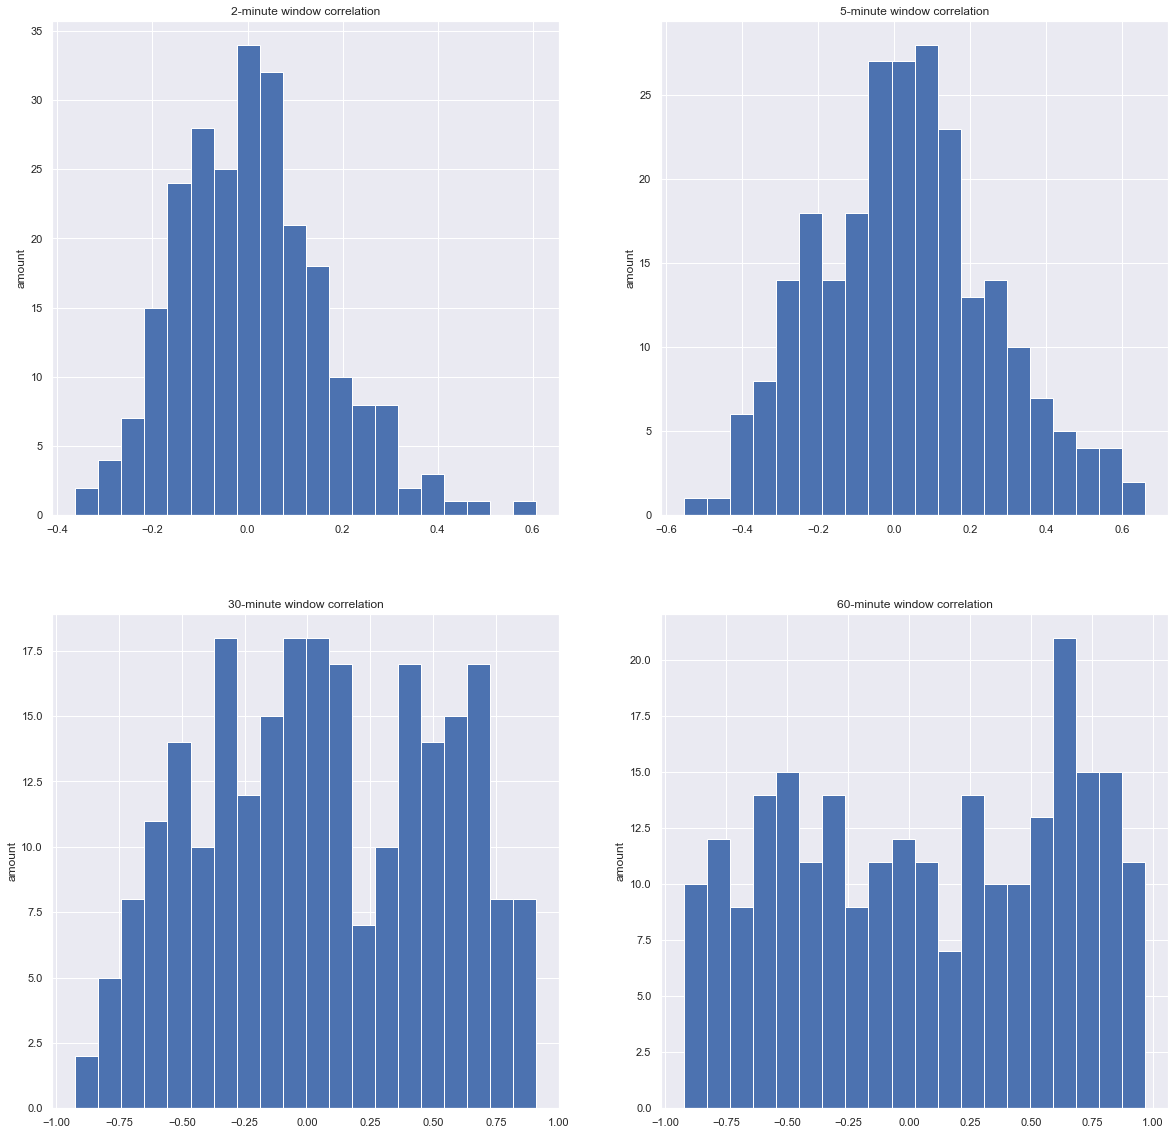

In [114]:
#histplot might be easier to observe this
# before lunch correlation
bins = 20
fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].hist(dic1[2],bins = bins, label = 'correlation')
# ax[0,0].set_xlabel('day')
ax[0,0].set_ylabel('amount')
ax[0,0].set_title('2-minute window correlation')
ax[0,1].hist(dic1[5],bins = bins,label = 'correlation')
# ax[0,1].set_xlabel('day')
ax[0,1].set_ylabel('amount')
ax[0,1].set_title('5-minute window correlation')
ax[1,0].hist(dic1[30],bins = bins,label = 'correlation')
# ax[1,0].set_xlabel('day')
ax[1,0].set_ylabel('amount')
ax[1,0].set_title('30-minute window correlation')
ax[1,1].hist(dic1[60],bins = bins,label = 'correlation')
# ax[1,1].set_xlabel('day')
ax[1,1].set_ylabel('amount')
ax[1,1].set_title('60-minute window correlation')

Text(0.5, 1.0, '60-minute window correlation')

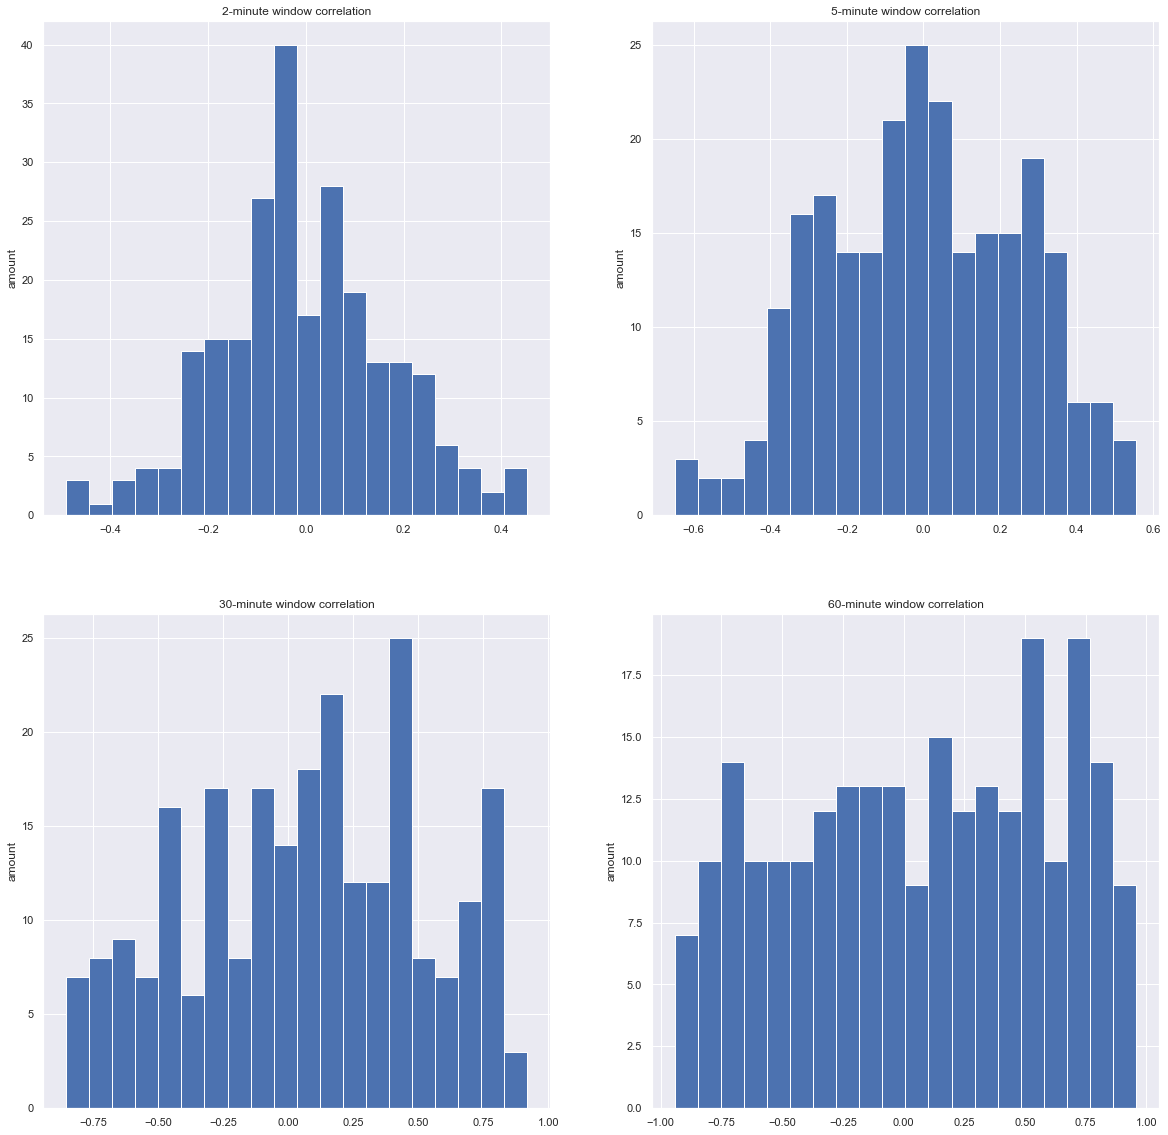

In [115]:
#histplot might be easier to observe this
# after lunch correlation
bins = 20
fig,ax = plt.subplots(2,2,figsize = (20,20))
ax[0,0].hist(dic2[2],bins = bins, label = 'correlation')
# ax[0,0].set_xlabel('day')
ax[0,0].set_ylabel('amount')
ax[0,0].set_title('2-minute window correlation')
ax[0,1].hist(dic2[5],bins = bins,label = 'correlation')
# ax[0,1].set_xlabel('day')
ax[0,1].set_ylabel('amount')
ax[0,1].set_title('5-minute window correlation')
ax[1,0].hist(dic2[30],bins = bins,label = 'correlation')
# ax[1,0].set_xlabel('day')
ax[1,0].set_ylabel('amount')
ax[1,0].set_title('30-minute window correlation')
ax[1,1].hist(dic2[60],bins = bins,label = 'correlation')
# ax[1,1].set_xlabel('day')
ax[1,1].set_ylabel('amount')
ax[1,1].set_title('60-minute window correlation')